<a href="https://colab.research.google.com/github/idarwati/Health-Data-Analytics-Portfolio/blob/Day-6/H6_Patient_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

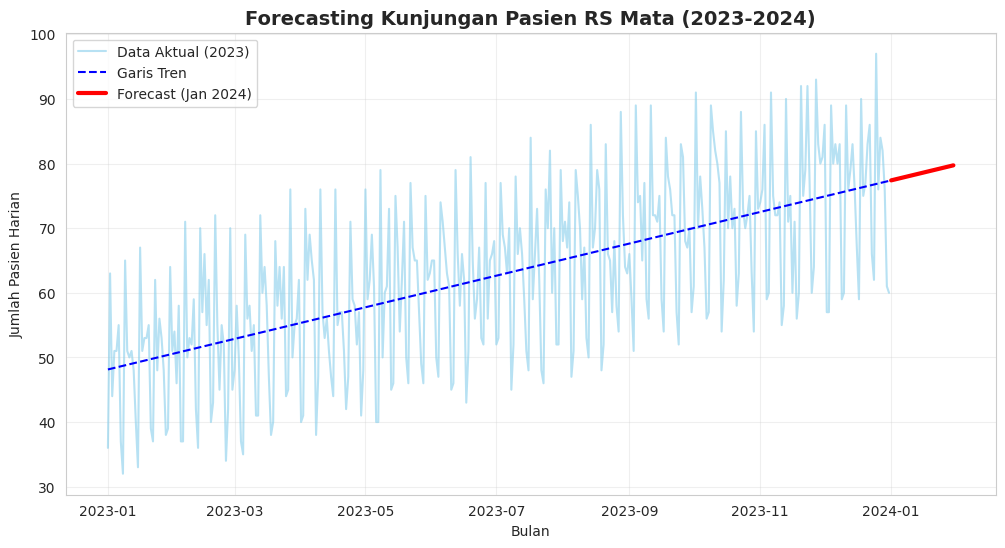

=== Prediksi Rata-rata Kunjungan Januari 2024 ===
Sekitar 78 pasien per hari.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import datetime as dt

# Setup Tampilan
sns.set_style("whitegrid")

# ==========================================
# 1. GENERATE DATA TIME SERIES (1 TAHUN)
# ==========================================
np.random.seed(42)

# Buat tanggal dari 1 Jan 2023 sampai 31 Des 2023
dates = pd.date_range(start='2023-01-01', end='2023-12-31')
n_days = len(dates)

# Pola Dasar: Tren naik perlahan (RS makin dikenal)
# Y = aX + b (Naik 0.05 pasien per hari)
trend = np.linspace(50, 80, n_days)

# Pola Musiman (Weekly Seasonality)
# Senin-Jumat ramai, Sabtu/Minggu sepi
seasonality = []
for d in dates:
    if d.weekday() >= 5: # 5=Sabtu, 6=Minggu
        seasonality.append(np.random.randint(-20, -10)) # Drop drastis saat weekend
    elif d.weekday() == 0: # 0=Senin
        seasonality.append(np.random.randint(10, 20))   # Lonjakan hari Senin
    else:
        seasonality.append(np.random.normal(0, 5))      # Hari biasa variasi normal

# Gabungkan Tren + Musiman + Noise Acak
visits = trend + np.array(seasonality)
visits = visits.astype(int) # Bulatkan jadi bilangan bulat (jumlah orang)

# Buat DataFrame
df = pd.DataFrame({'Tanggal': dates, 'Jumlah_Pasien': visits})

# ==========================================
# 2. MEMBUAT MODEL PREDIKSI (FORECASTING)
# ==========================================

# Komputer tidak bisa baca tanggal "2023-01-01", harus diubah jadi angka urut (Ordinal)
df['Tanggal_Angka'] = df['Tanggal'].map(dt.datetime.toordinal)

# Siapkan Data Latih
X = df[['Tanggal_Angka']]
y = df['Jumlah_Pasien']

# Latih Model Regresi Linear (Mencari Garis Tren)
model = LinearRegression()
model.fit(X, y)

# ==========================================
# 3. MERAMAL MASA DEPAN (Januari 2024)
# ==========================================

# Buat tanggal masa depan (30 hari ke depan)
future_dates = pd.date_range(start='2024-01-01', periods=30)
future_df = pd.DataFrame({'Tanggal': future_dates})
future_df['Tanggal_Angka'] = future_df['Tanggal'].map(dt.datetime.toordinal)

# Prediksi!
future_prediction = model.predict(future_df[['Tanggal_Angka']])
future_df['Prediksi_Pasien'] = future_prediction

# ==========================================
# 4. VISUALISASI (SEJARAH vs MASA DEPAN)
# ==========================================
plt.figure(figsize=(12, 6))

# Plot Data Sejarah (2023) - Titik-titik biru
plt.plot(df['Tanggal'], df['Jumlah_Pasien'], label='Data Aktual (2023)', color='skyblue', alpha=0.6)

# Plot Garis Tren (Regresi) - Garis Putus-putus
plt.plot(df['Tanggal'], model.predict(X), label='Garis Tren', color='blue', linestyle='--')

# Plot Prediksi Masa Depan (2024) - Garis Merah Tebal
plt.plot(future_df['Tanggal'], future_df['Prediksi_Pasien'], label='Forecast (Jan 2024)', color='red', linewidth=3)

plt.title('Forecasting Kunjungan Pasien RS Mata (2023-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pasien Harian')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("=== Prediksi Rata-rata Kunjungan Januari 2024 ===")
print(f"Sekitar {int(future_prediction.mean())} pasien per hari.")